# Importing libraries

In [2]:
# Import Libraries 
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

path= r'C:\Users\ANITA BOADU\Instacart Basket Analysis'

# Load the combined pickle file of Customer and Instacart Basket Analysis
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merge_custs_4.9.pkl'))

# Preview the data
df.head()

,Unnamed: 0,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,loyalty_flag,spending_flag,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,1,2398795,1,2,3,7,15.0,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,10258,2,0,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,1,2398795,1,2,3,7,15.0,12427,3,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,1,2398795,1,2,3,7,15.0,13176,4,0,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,1,2398795,1,2,3,7,15.0,26088,5,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [3]:
df.rename(columns={
    "order_day_of_week": "orders_day_of_week",
    "number_of_dependants": "n_dependants",
    "marital_status": "fam_status"
}, inplace=True)

In [4]:
df.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,loyalty_flag,spending_flag,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,2398795,1,2,3,7,15.0,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,10258,2,0,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,1,2398795,1,2,3,7,15.0,12427,3,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,1,2398795,1,2,3,7,15.0,13176,4,0,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,1,2398795,1,2,3,7,15.0,26088,5,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

In [7]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,spending_flag,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# Check what columns the data really have

df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

## PII check

#### This dataset contains some personal information such as (income,age,user_id,etc.) This dataset will only be accessed by authorized personel within the company and any presentations or reports will use aggregated insights without exposing individual personal details.

In [6]:
#creating a region column based on state column
northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", 
             "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"]
midwest = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", 
           "Iowa", "Kansas", "Minnesota", "Missouri", 
           "Nebraska", "North Dakota", "South Dakota"]
south = ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", 
         "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", 
         "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"]
west = ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", 
        "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]

In [7]:
#Assign states to region 
def region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Unknown"

In [9]:
#creating a region column
df["Region"] = df["state"].apply(region)

In [10]:
#checking region cloumn
df["Region"].value_counts()

Region
South        10109228
West          7772314
Midwest       7113810
Northeast     5361605
Name: count, dtype: int64

In [13]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,Region
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [11]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'Region'],
      dtype='object')

In [12]:
#checking the spending habits differences between U.S States
pd.crosstab(df["Region"], df["spending_flag"],dropna=False)

spending_flag,High spender,Low spender
Region,,
Midwest,148432,6965378
Northeast,102953,5258652
South,197297,9911931
West,150010,7622304


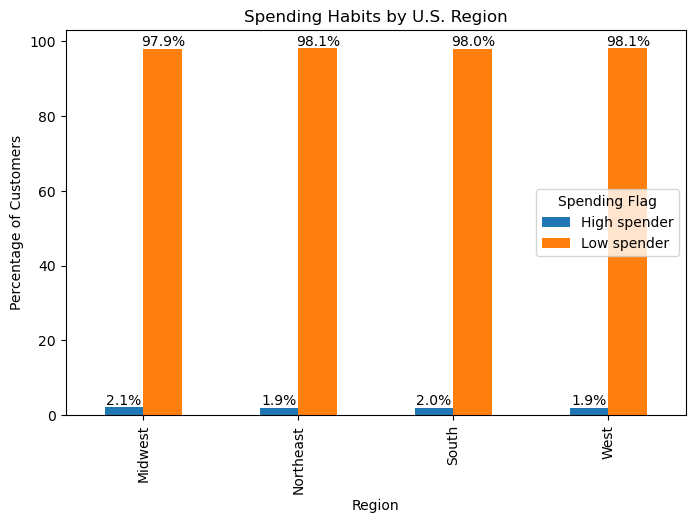

In [13]:
spending_by_region = pd.crosstab(df["Region"], df["spending_flag"], normalize="index") * 100

ax = spending_by_region.plot(kind="bar", stacked=False, figsize=(8,5))
plt.ylabel("Percentage of Customers")
plt.title("Spending Habits by U.S. Region")
plt.legend(title="Spending Flag")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge")

plt.show()

In [14]:
#exporting the visualization
fig=ax.get_figure()

In [15]:
fig.figure.savefig(os.path.join(path,'Analysis','Visualizations','spending_by_region.png'))

In [16]:
#excluding customers who has less order than 5
customer_orders = df.groupby("user_id")["order_number"].max().reset_index()

In [17]:
customer_orders["exclusion_flag"] = customer_orders["order_number"] < 5

In [18]:
df_active = df.merge(customer_orders[["user_id", "exclusion_flag"]],on="user_id", how="left")

In [19]:
df_active = df_active[df_active["exclusion_flag"] == False].copy()

In [20]:
#exporting new dataset 
df_active.to_pickle(os.path.join(path,'Data','Prepared Data','final_project.pkl'))

In [21]:
df_active.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False


In [22]:
df_active.shape

(29330587, 26)

In [23]:
#defining profiles 
def customer_profile(row):
    # Young Adult
    if row['age'] < 30 and row['n_dependants'] == 0:
        return "Young Adult"

    # Young Parent
    if 25 <= row['age'] <= 40 and row['n_dependants'] > 0 :
        return "Young Parent"

    # Wealthy Professional
    if row['income'] > 100000 and row['n_dependants'] <= 1:
        return "Wealthy Professional"

    # Budget-Conscious Family
    if row['income'] < 60000 and row['n_dependants'] >= 2:
        return "Budget-Conscious Family"

    # Retired / Old Adult
    if row['age'] > 60 :
        return "Retired/Old Adult"

    return "Other"

df_active["customer_profile"] = df_active.apply(customer_profile, axis=1)

In [24]:
#checking customer_profile
df_active['customer_profile'].value_counts(dropna=False)

customer_profile
Other                      8564927
Wealthy Professional       6617278
Retired/Old Adult          5739522
Young Parent               5476199
Budget-Conscious Family    1562152
Young Adult                1370509
Name: count, dtype: int64

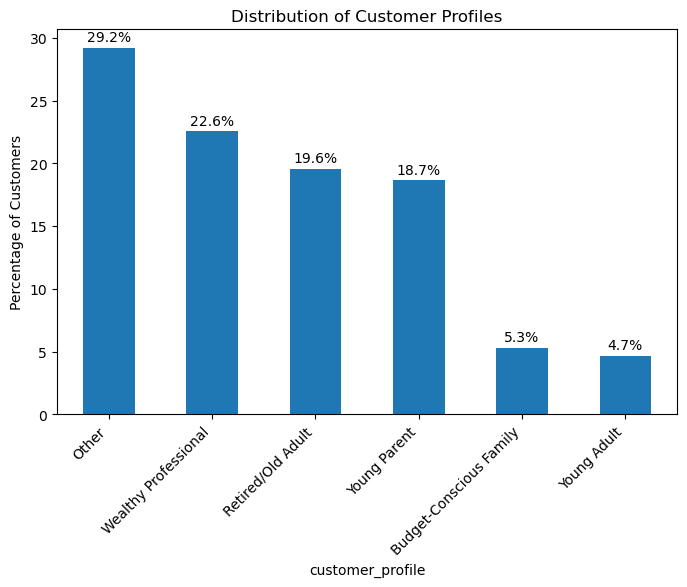

In [25]:
# distribution of profiles
profile_bar = df_active["customer_profile"].value_counts(normalize=True) * 100

ax = profile_bar.plot(kind="bar", figsize=(8,5))
plt.ylabel("Percentage of Customers")
plt.title("Distribution of Customer Profiles")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(profile_bar):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center")

plt.show()

In [26]:
bar_customer_profile=ax.get_figure()

In [28]:
bar_customer_profile.figure.savefig(os.path.join(path,'Analysis','Visualizations','distribution_of_customer_profiles.png'))

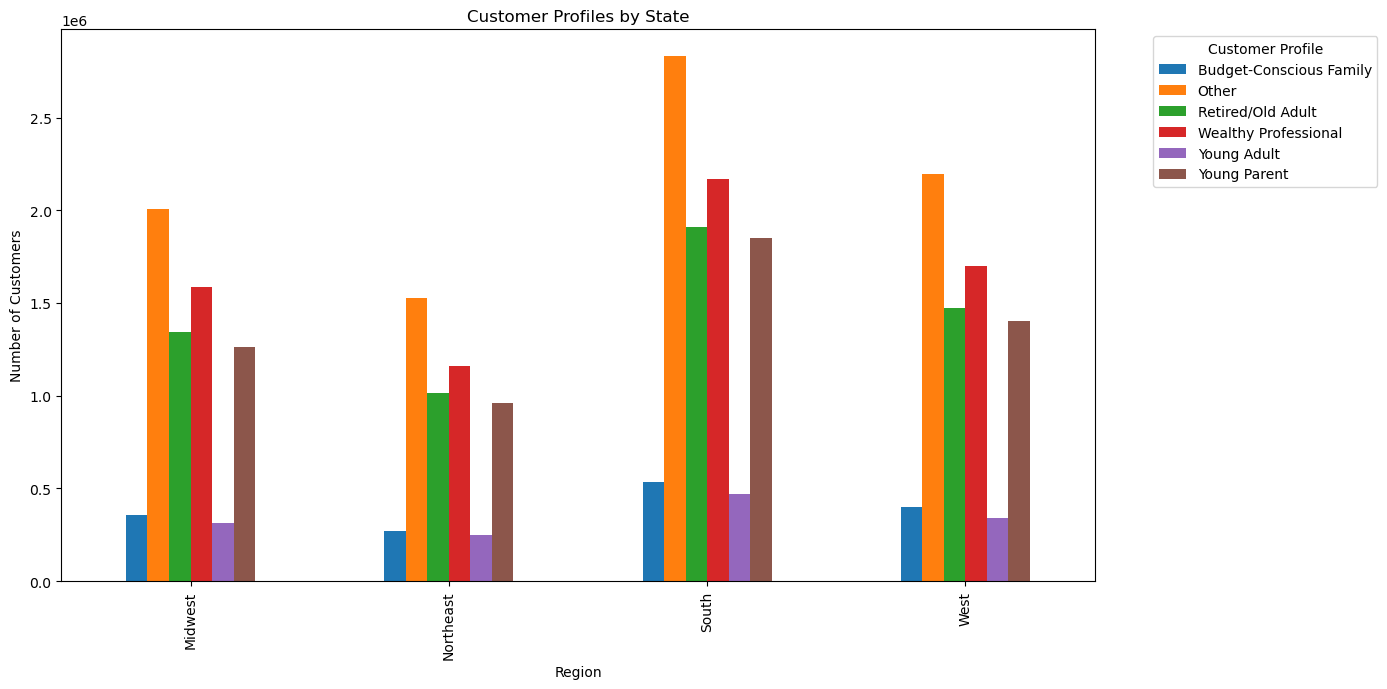

In [29]:
#Customer profiles by region
state_profile_counts = pd.crosstab(df_active["Region"], df_active["customer_profile"])

ax = state_profile_counts.plot(kind="bar", stacked=False, figsize=(14,7))

plt.title("Customer Profiles by State")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)  
plt.legend(title="Customer Profile", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [30]:
bar_cust_region=ax.get_figure()

In [31]:
bar_cust_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','distribution_of_customer_profiles_region.png'))

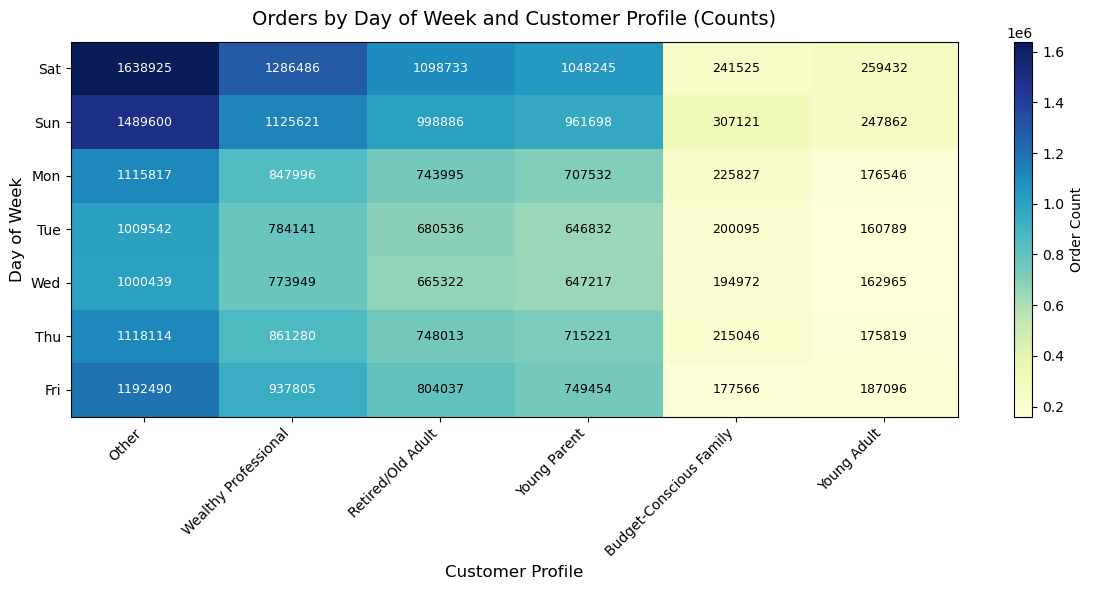

In [32]:
dow_profile_ct = pd.crosstab(df_active["orders_day_of_week"], df_active["customer_profile"])

profile_order = dow_profile_ct.sum(axis=0).sort_values(ascending=False).index.tolist()
dow_profile_ct = dow_profile_ct[profile_order]

day_labels_map = {0:"Sat", 1:"Sun", 2:"Mon", 3:"Tue", 4:"Wed", 5:"Thu", 6:"Fri"}
y_ticks = list(dow_profile_ct.index)
y_ticklabels = [day_labels_map.get(int(v), str(v)) for v in y_ticks]

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(dow_profile_ct.values, aspect="auto", cmap="YlGnBu")

ax.set_title("Orders by Day of Week and Customer Profile (Counts)", fontsize=14, pad=12)
ax.set_xlabel("Customer Profile", fontsize=12)
ax.set_ylabel("Day of Week", fontsize=12)

ax.set_xticks(np.arange(dow_profile_ct.shape[1]))
ax.set_xticklabels(dow_profile_ct.columns, rotation=45, ha="right")

ax.set_yticks(np.arange(dow_profile_ct.shape[0]))
ax.set_yticklabels(y_ticklabels)

vals = dow_profile_ct.values
threshold = vals.max() / 2

for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        color = "white" if vals[i, j] > threshold else "black"
        ax.text(j, i, f"{int(vals[i, j])}", ha="center", va="center", color=color, fontsize=9)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Order Count", rotation=90)

plt.tight_layout()
plt.show()

In [33]:
heatmap=ax.get_figure()

In [34]:
heatmap.figure.savefig(os.path.join(path,'Analysis','Visualizations','orders_by_dow_profile.png'))

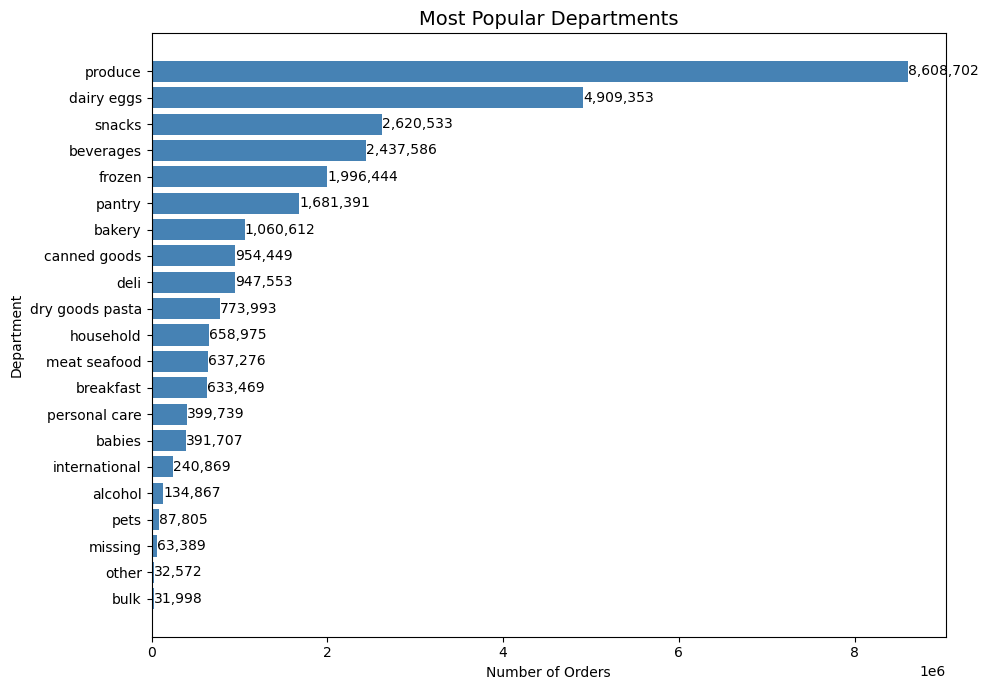

In [35]:
dept_map = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}
df_active["department_name"] = df_active["department_id"].map(dept_map)

dept_counts = df_active["department_name"].value_counts().sort_values(ascending=True)

ax=plt.figure(figsize=(10,7))
bars = plt.barh(dept_counts.index, dept_counts.values, color="steelblue")

for bar in bars:
    plt.text(bar.get_width() + 500, 
             bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width()):,}", va="center")

plt.title("Most Popular Departments", fontsize=14)
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

In [36]:
department_popularity=ax.get_figure()

In [37]:
department_popularity.figure.savefig(os.path.join(path,'Analysis','Visualizations','department_popularity.png'))

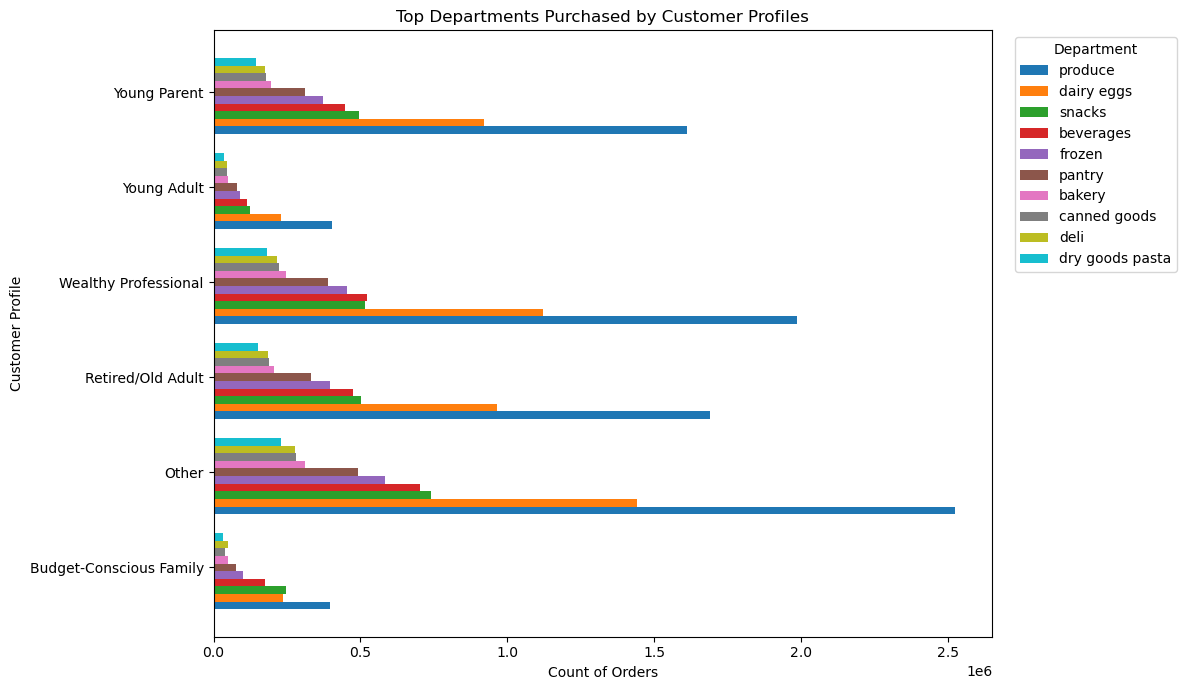

In [38]:
# 1) department_id → department_name eşleşmesi
df_active["department_name"] = df_active["department_id"].map(dept_map)

# 2) Profil x Departman COUNT matrisi
mat = (df_active
       .groupby(["customer_profile", "department_name"])
       .size()
       .unstack(fill_value=0))

# 3) En popüler TOP-K departmanı seç
TOP_K = 10
top_depts = mat.sum(axis=0).sort_values(ascending=False).head(TOP_K).index
mat = mat[top_depts]

# 4) Yatay, yan yana bar chart
profiles = mat.index.tolist()
depts    = mat.columns.tolist()

n_profiles = len(profiles)
n_depts    = len(depts)

bar_h = 0.8 / n_depts
y_base = np.arange(n_profiles)

ax=plt.figure(figsize=(12, 7))

for i, dept in enumerate(depts):
    y_pos = y_base - 0.4 + i*bar_h
    plt.barh(y_pos, mat[dept].values, height=bar_h, label=dept)

plt.yticks(y_base, profiles)
plt.xlabel("Count of Orders")
plt.ylabel("Customer Profile")
plt.title("Top Departments Purchased by Customer Profiles")

plt.legend(title="Department", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [39]:
top_dep_dist_cust_prof=ax.get_figure()

In [40]:
top_dep_dist_cust_prof.figure.savefig(os.path.join(path,'Analysis','Visualizations','top_dep_dist_cust_prof.png'))

In [41]:
# Define your path
path = r"C:\Users\ANITA BOADU\Instacart Basket Analysis"

In [43]:
df_active.to_pickle(os.path.join(path,'Data','Prepared Data','instacart_final_dataset.pkl'))